This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

#plus ori model
train_images_with_ori_channels = np.concatenate(
    train_images)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
train_images_with_ori_channels = train_images_with_ori_channels.reshape((60000, 28, 28, 1))

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 8ms/step - loss: 0.6090 - accuracy: 0.8138 - val_loss: 0.2961 - val_accuracy: 0.9072
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2538 - accuracy: 0.9211 - val_loss: 0.2066 - val_accuracy: 0.9394
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1666 - accuracy: 0.9481 - val_loss: 0.1924 - val_accuracy: 0.9406
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1182 - accuracy: 0.9642 - val_loss: 0.1466 - val_accuracy: 0.9558
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9730 - val_loss: 0.1828 - val_accuracy: 0.9445
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0626 - accuracy: 0.9799 - val_loss: 0.1366 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.1327 - val_accuracy: 0.9653
Epoch 

In [4]:
#plus ori model 어케함
model = get_model()
ori = model.fit(
    train_images_with_ori_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(128,) and logits.shape=(100352, 10)


**Plotting a validation accuracy comparison**

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_ori, "r-",
         label = "Validation accuracy with origin data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

NameError: name 'ori' is not defined

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3160 - accuracy: 0.1016 - val_loss: 2.3067 - val_accuracy: 0.1033
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2999 - accuracy: 0.1162 - val_loss: 2.3103 - val_accuracy: 0.1058
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2926 - accuracy: 0.1257 - val_loss: 2.3156 - val_accuracy: 0.1055
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2813 - accuracy: 0.1363 - val_loss: 2.3244 - val_accuracy: 0.1082
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2665 - accuracy: 0.1488 - val_loss: 2.3301 - val_accuracy: 0.1007
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2469 - accuracy: 0.1624 - val_loss: 2.3456 - val_accuracy: 0.1007
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2232 - accuracy: 0.1816 - val_loss: 2.3627 - val_accuracy: 0.0978

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 760.1927 - accuracy: 0.3480 - val_loss: 2.2501 - val_accuracy: 0.2072
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1298 - accuracy: 0.2206 - val_loss: 2.3405 - val_accuracy: 0.1909
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6723 - accuracy: 0.1889 - val_loss: 2.1315 - val_accuracy: 0.2164
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5838 - accuracy: 0.2063 - val_loss: 2.6104 - val_accuracy: 0.1667
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3172 - accuracy: 0.1724 - val_loss: 2.7872 - val_accuracy: 0.1658
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5046 - accuracy: 0.1748 - val_loss: 2.2644 - val_accuracy: 0.1612
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5817 - accuracy: 0.1920 - val_loss: 2.0753 - val_accuracy: 0.2072
Epoc

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3667 - accuracy: 0.9123 - val_loss: 0.1498 - val_accuracy: 0.9567
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1260 - accuracy: 0.9652 - val_loss: 0.1714 - val_accuracy: 0.9617
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9734 - val_loss: 0.1557 - val_accuracy: 0.9675
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9783 - val_loss: 0.1487 - val_accuracy: 0.9719
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9830 - val_loss: 0.1557 - val_accuracy: 0.9737
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9847 - val_loss: 0.1736 - val_accuracy: 0.9707
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9871 - val_loss: 0.1697 - val_accuracy: 0.9760
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6769 - accuracy: 0.8334 - val_loss: 0.3607 - val_accuracy: 0.9039
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.9032 - val_loss: 0.3102 - val_accuracy: 0.9136
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9121 - val_loss: 0.2929 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9155 - val_loss: 0.2838 - val_accuracy: 0.9211
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9184 - val_loss: 0.2785 - val_accuracy: 0.9225
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9204 - val_loss: 0.2751 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9219 - val_loss: 0.2723 - val_accuracy: 0.9275
Epoch 

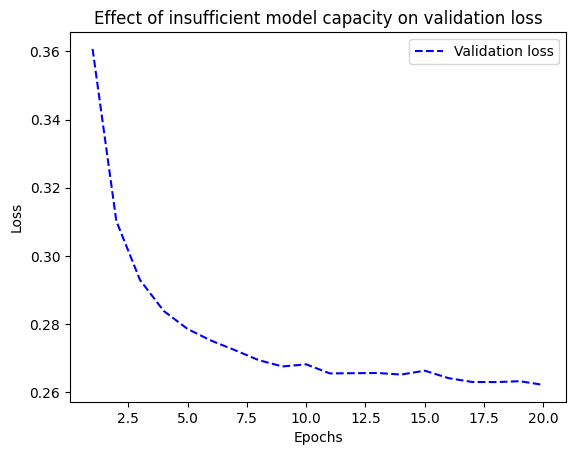

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3624 - accuracy: 0.8993 - val_loss: 0.1832 - val_accuracy: 0.9464
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1583 - accuracy: 0.9534 - val_loss: 0.1362 - val_accuracy: 0.9605
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1115 - accuracy: 0.9669 - val_loss: 0.1129 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0845 - accuracy: 0.9744 - val_loss: 0.1028 - val_accuracy: 0.9718
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.1015 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.1007 - val_accuracy: 0.9717
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0958 - val_accuracy: 0.9717
Epoch 

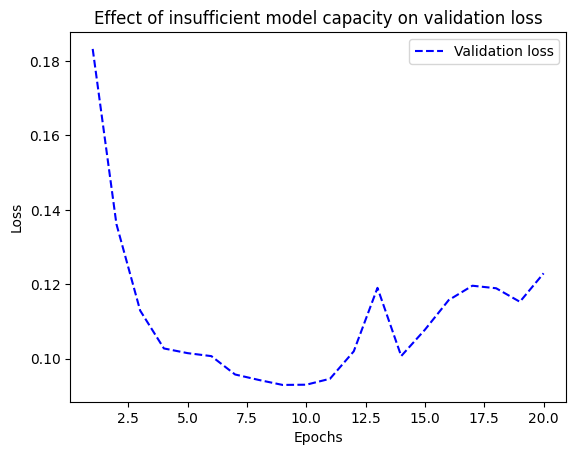

In [12]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() #overfitting

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5215 - accuracy: 0.7769 - val_loss: 0.4045 - val_accuracy: 0.8492
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3245 - accuracy: 0.8907 - val_loss: 0.3087 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2446 - accuracy: 0.9166 - val_loss: 0.2827 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1961 - accuracy: 0.9323 - val_loss: 0.3144 - val_accuracy: 0.8741
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1637 - accuracy: 0.9457 - val_loss: 0.2806 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1389 - accuracy: 0.9556 - val_loss: 0.2884 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1182 - accuracy: 0.9636 - val_loss: 0.2979 - val_accuracy: 0.8838
Epoch 8/20
30

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 90ms/step - loss: 0.6106 - accuracy: 0.7721 - val_loss: 0.5395 - val_accuracy: 0.8376
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4807 - accuracy: 0.8632 - val_loss: 0.4477 - val_accuracy: 0.8609
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3915 - accuracy: 0.8865 - val_loss: 0.3817 - val_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3261 - accuracy: 0.9004 - val_loss: 0.3387 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2789 - accuracy: 0.9142 - val_loss: 0.3120 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2436 - accuracy: 0.9229 - val_loss: 0.2972 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2159 - accuracy: 0.9301 - val_loss: 0.2856 - val_accuracy: 0.8864
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.5733 - accuracy: 0.7175 - val_loss: 0.3841 - val_accuracy: 0.8357
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3359 - accuracy: 0.8583 - val_loss: 0.2839 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2392 - accuracy: 0.9027 - val_loss: 0.2672 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1873 - accuracy: 0.9264 - val_loss: 0.2750 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1376 - accuracy: 0.9484 - val_loss: 0.3203 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1263 - accuracy: 0.9527 - val_loss: 0.2903 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0672 - accuracy: 0.9774 - val_loss: 0.3450 - val_accuracy: 0.8854
Epoch 8/20
30

In [16]:
#Visualize validation loss of the original model,
#model with lower capacity and model with larger capacity

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [17]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.7069 - accuracy: 0.6509 - val_loss: 0.6379 - val_accuracy: 0.7595
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5809 - accuracy: 0.8110 - val_loss: 0.5471 - val_accuracy: 0.8063
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4643 - accuracy: 0.8831 - val_loss: 0.4339 - val_accuracy: 0.8777
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3654 - accuracy: 0.9076 - val_loss: 0.3863 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3117 - accuracy: 0.9201 - val_loss: 0.3604 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2825 - accuracy: 0.9280 - val_loss: 0.3484 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2610 - accuracy: 0.9371 - val_loss: 0.3480 - val_accuracy: 0.8861
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [19]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.6520 - accuracy: 0.6215 - val_loss: 0.5833 - val_accuracy: 0.7671
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5506 - accuracy: 0.7502 - val_loss: 0.4751 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4717 - accuracy: 0.8135 - val_loss: 0.3887 - val_accuracy: 0.8739
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4120 - accuracy: 0.8497 - val_loss: 0.3481 - val_accuracy: 0.8767
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3651 - accuracy: 0.8735 - val_loss: 0.3167 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3212 - accuracy: 0.8958 - val_loss: 0.3027 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2829 - accuracy: 0.9101 - val_loss: 0.2849 - val_accuracy: 0.8849
Epoch 8/20
30

## Summary